# Problema 6

In [1]:
import numpy as np
from timeit import default_timer
import matplotlib.pyplot as plt

def steepest_descent(A, b, x, tol= 1e-10, max_iter = False):

    x_k = x
    r_k = b - A @ x_k
    k = 0

    while np.linalg.norm(r_k) > tol :

        t_k = (r_k.T @ r_k) / (r_k.T @ A @ r_k)
        x_k = x_k + t_k * r_k
        r_k = r_k - t_k * A @ r_k
        
        if max_iter != False and k == max_iter:
            return Steepest_vector(x_k, k, r_k)

        k += 1

    return x_k, k, r_k

# Pregunta 9

Mediante la entrada de una matriz $M$, se escribio la funcion mypinv, la cual entrega la inversa de Moore Penrose de M a traves de la descomposición de valores singulares. Para solucionar el problema del error del punto flotante, se redondeo los valores de las matriz diagonal $S$ en 10 cifras, para evitar errores en el producto de la función.

In [2]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
from numpy import linalg as la

def mypinv(M):
    #Se utiliza el comando SVD para obtener la descomposición SVD.
    U, S, V = linalg.svd(M, full_matrices=True)
    #Se creo una matriz nula de la misma dimension de la matriz M.
    smat = np.zeros(M.shape)
    #Los valores diagonales se llenan con los valores entregados en la matriz S de la SVD de M.
    for i in range(0, smat.shape[0]):
        for j in range(0, smat.shape[1]):
            if i==j:
                # Se redondea los valores diagonales de la matriz S para evitar el error del punto flotante.
                S[i] = round(S[i],12)
                if S[i]==0:
                    smat[i,i]=0
                else:
                    smat[i,i]=1/S[i]
    #Finalmente, obtenemos la inversa generalizada mediante el siguiente producto.                
    return V.transpose() @ smat.transpose() @ U.transpose()

La pseudoinversa de la primera matriz de $2.b$ esta dada por:

In [3]:
Matrix1 = np.array([[1,1],[0,0]])
mypinv(Matrix1)

array([[0.5, 0. ],
       [0.5, 0. ]])

La pseudoinversa de la segunda matriz de $2.b$ esta dada por:

In [4]:
Matrix2 = np.array([[1],[2]])
mypinv(Matrix2)

array([[0.2, 0.4]])

La pseudoinversa de la tercera matriz de $2.b$ esta dada por:

In [5]:
Matrix3 = np.array([[1,1,1],[2,2,2]])
mypinv(Matrix3)

array([[0.06666667, 0.13333333],
       [0.06666667, 0.13333333],
       [0.06666667, 0.13333333]])

# Pregunta 10

Primero, se define la función symmetric_mat($n$) que calcula matrices aleatorias de tamaño $n$.

In [6]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
from numpy import linalg as la

def symmetric_mat(n): #n es el tamaño de la matriz cuadrada
    M=np.random.rand(n,n)
    return (M+M.transpose())/2

Se inserta un pequeño ejemplo, para observar como se desarrolla la función.

In [7]:
symmetric_mat(4)

array([[0.10721545, 0.87805825, 0.12639324, 0.52379395],
       [0.87805825, 0.26962966, 0.84754715, 0.52770637],
       [0.12639324, 0.84754715, 0.35828772, 0.59715758],
       [0.52379395, 0.52770637, 0.59715758, 0.29913936]])

Luego, se definirá la función non_singular_mat($n$) que calcula una matriz invertible de tamaño $n$. Por la hint dada, se tiene que tenemos que transformarla en una matriz estrictamente dominante, pues esta es invertible. Para ello, se definirá la funcion generate_random_row($i,n$) el cual generara una fila que cumpla la condición de las matrices diagonalmente dominantes.

In [8]:
def generate_random_row(i,n): #funcion generadora de vector fila aleatorio
    M=np.random.rand(1,n)
    while M[0,i] <= np.sum(M)-M[0,i]: # negacion condicion necesaria para que sea diagonal dominante
        M=np.random.rand(1,n)
    return M
        
def non_singular_mat(n): #n es el tamaño de la matriz cuadrada
    M=np.random.rand(n,n)
    for i in range(0,n):
        diag=abs(M[i,i]) #valor de la matriz en (i,i)
        sum_value_nd=np.sum(abs(M[i]))-diag #suma de los valores absolutos de los elementos no diagonales
        if (diag <= sum_value_nd): # si no cumple la condicion necesaria, entonces
            M[i]=generate_random_row(i,n) #se genera una fila que si la cumpla
    return M

Se inserta un pequeño ejemplo, para observar como se desarrolla la función.

In [9]:
non_singular_mat(4)

array([[0.82948648, 0.12385127, 0.47298869, 0.10286567],
       [0.63340476, 0.78505257, 0.03285031, 0.05472146],
       [0.36285358, 0.01942809, 0.9578427 , 0.2863357 ],
       [0.04432076, 0.0130864 , 0.61904677, 0.9612981 ]])

Luego, se definirá la función tri_mat($n$) que calcula una matriz triangular superior invertible de tamaño $n$. Para que esta matriz sea invertible, los valores diagonales tienen que ser distinto de cero y se tiene que cumplir $i\geq j$ donde $i,j$ detemnin la posicion de la matriz $M, m_{i,j}$

In [10]:
def tri_mat(n):
    M=np.random.rand(n,n)
    for i in range(0,n):
        for j in range(0,n):
            if i>j:
                M[i,j]=0  # condicion necesario para que sea triangular superior
        while M[i,i]==0: #condicion necesaria para que sea invertible
            M[i,i]=np.random.rand(1,1)
    return M

Se inserta un pequeño ejemplo, para observar como se desarrolla la función.

In [11]:
tri_mat(4)

array([[0.2649947 , 0.12606384, 0.47917281, 0.37072674],
       [0.        , 0.42350861, 0.04035041, 0.5437707 ],
       [0.        , 0.        , 0.2663676 , 0.48428795],
       [0.        , 0.        , 0.        , 0.37366784]])

# Problema 11

In [12]:
def my_gc(A,x,b,C,tol = 1e-5,maxiter = 1000):
    x=np.copy(x)
    r=b - A@x
    w=np.linalg.solve(C,r) # Calcula w=inv(C)*r. w=w0
    v=np.linalg.solve(C.T,w) # Calcula v=inv(transpose(C))*w. v=v0
    alfa=np.linalg.norm(w)**2
    k=0
    
    while k<=maxiter:
        if np.linalg.norm(v)<=tol:
            break
        u=A@v # u=Av_k
        t=alfa/(u.T@v) # t=t_k
        x+=t*v # x=x_k
        r-=t*u # r=r_k
        w=np.linalg.solve(C.T,r) # w=w_k
        beta=np.linalg.norm(w)**2 # beta=inner(w_k,w_k)
        if beta<tol:
            if np.linalg.norm(r)<tol:
                break
        s=beta/alfa #s=s_k
        v=np.linalg.solve(C.T,w)+s*v # Update v=v_(k+1)
        alfa=beta # Update alfa
        k+=1 # Update k
        
    if k>maxiter:
        return False
        
    return x, r, k

## a)

In [13]:
def mat2(n, tau):
    A = np.random.rand(n,n)*2-1
    A = (A + A.T)/2
    A[ np.abs(A) > tau] = 0
    A[np.eye(n) == 1] = 1
    return A

## b)

In [14]:
def test_b_v1():
    times_gc = []
    times_np = []
    
    for n in range(100, 501):
        
        A = mat2(n, 0.05)
        b = (np.random.rand(n).T*2-1).reshape((n,1))
        
        start = default_timer()
        np.linalg.solve(A,b)
        end = default_timer()
        times_np.append(end-start)
        
        x_0 = np.ones((n,1))
        I = np.eye(n)
        
        start = default_timer()
        my_gc(A, x_0, b, I, 1e-12, n)
        end = default_timer()
        times_gc.append(end-start)
    return times_gc, times_np

In [15]:
cg_times, np_times = test_b_v1()
cg_times = np.array(cg_times).reshape((401, 1))
np_times = np.array(np_times).reshape((401, 1))

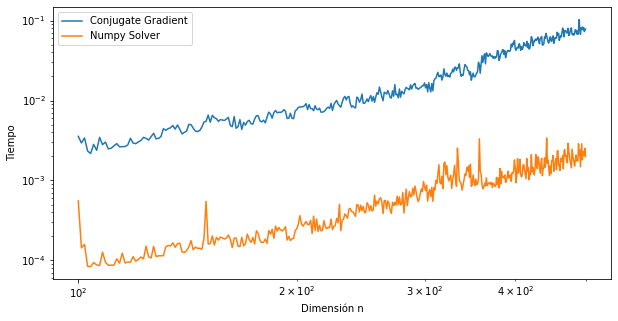

In [16]:
N = np.array([i for i in range(100, 501)]).reshape((401,1))
plt.figure(figsize = (10,5))
plt.loglog(N, cg_times, label= "Conjugate Gradient")
plt.loglog(N, np_times, label = "Numpy Solver")
plt.xlabel("Dimensión n")
plt.ylabel("Tiempo")
plt.legend()
plt.show()

In [17]:
def test_b_v2():
    times_gc = []
    times_np = []
    
    for n in range(100, 501):
        
        A = mat2(n, 0.05)
        b = (np.random.rand(n).T*2-1).reshape((n,1))
        
        x_0 = np.ones((n,1))
        I = np.eye(n)
        
        start = default_timer()
        my_gc(A, x_0, b, I, 1e-12, n)
        end = default_timer()
        times_gc.append(end-start)
        
        start = default_timer()
        np.linalg.solve(A,b)
        end = default_timer()
        times_np.append(end-start)
        
    return times_gc, times_np

In [18]:
cg_times, np_times = test_b_v2()
cg_times = np.array(cg_times).reshape((401, 1))
np_times = np.array(np_times).reshape((401, 1))

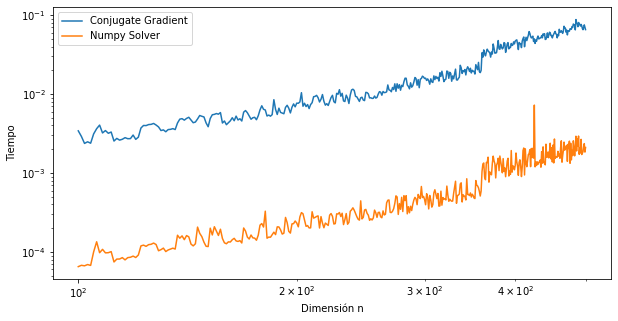

In [19]:
N = np.array([i for i in range(100, 501)]).reshape((401,1))
plt.figure(figsize = (10,5))
plt.loglog(N, cg_times, label= "Conjugate Gradient")
plt.loglog(N, np_times, label = "Numpy Solver")
plt.xlabel("Dimensión n")
plt.ylabel("Tiempo")
plt.legend()
plt.show()